# PART 1

### Import necessary packages and also PCA function from exercise 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clt

from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg

### Reading the data (also skipping first 1000 rows)

In [2]:
data = np.genfromtxt("MI_timesteps.txt", dtype='int', skip_header=1000)
print(f"Shape: {data.shape}")
print(f"Head:\n{data[:10]}")
print(f"Max:\n{np.max(data[:, 1:])}")
print(f"Min:\n{np.min(data[:, 1:])}")

Shape: (14001, 10)
Head:
[[1001    0    2   97    7    0    0    5    1   43]
 [1002    0    2   96    7    0    0    5    1   45]
 [1003    0    2   95    6    0    0    5    0   46]
 [1004    0    2   94    6    0    0    4    1   46]
 [1005    0    2   92    6    0    0    5    0   46]
 [1006    0    2   92    6    0    0    4    0   49]
 [1007    0    2   91    6    0    0    5    0   49]
 [1008    0    2   90    6    0    0    5    0   51]
 [1009    0    2   89    6    0    0    4    0   52]
 [1010    0    2   89    5    0    0    3    1   53]]
Max:
200
Min:
0


In [3]:
M = data.shape[0] - 350
matrix = np.zeros((M, 1053))
for i in range(M):
    matrix[i] = data[i:i+351, 1:4].flatten()

In [4]:
matrix.shape

(13651, 1053)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pc = pca.fit_transform(matrix)
print(pc.shape)

(13651, 3)


# PART 2

### Normalized between min=0 and max=200

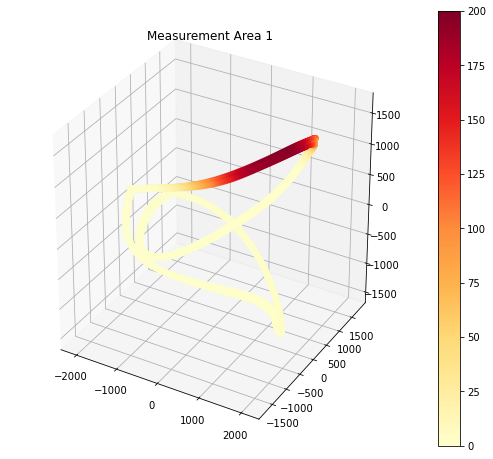

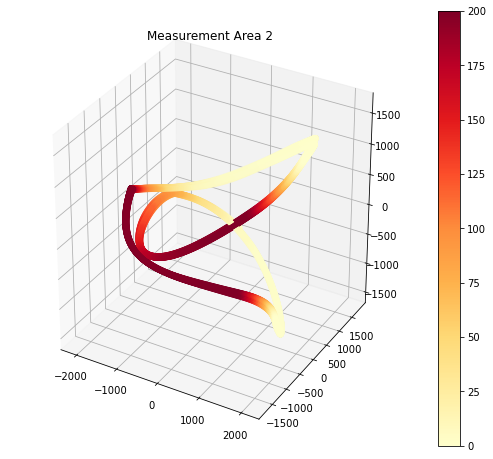

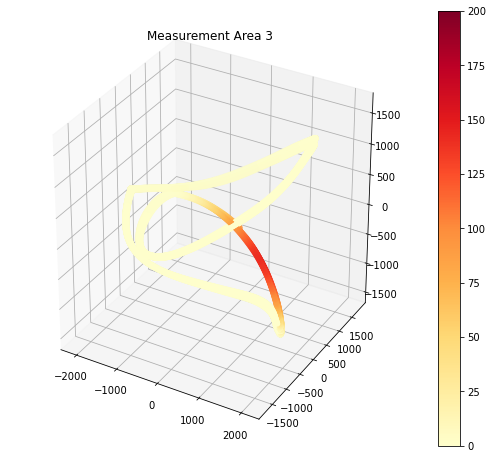

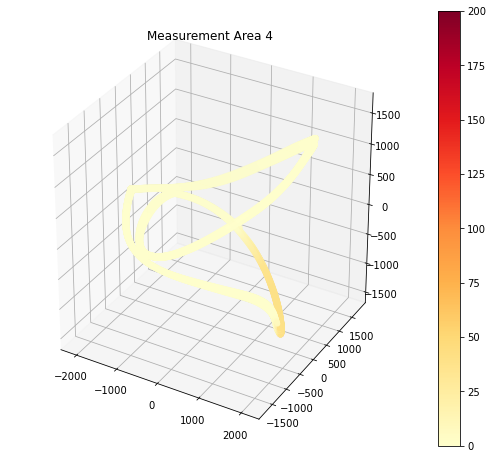

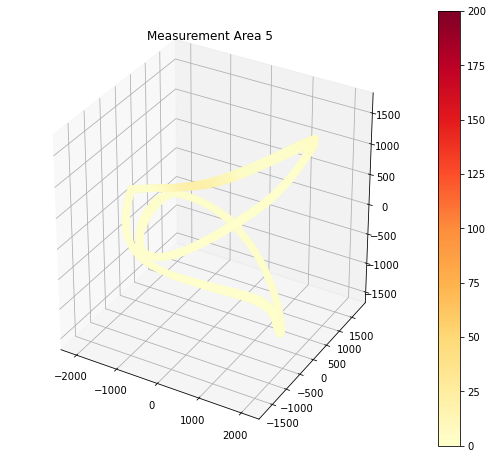

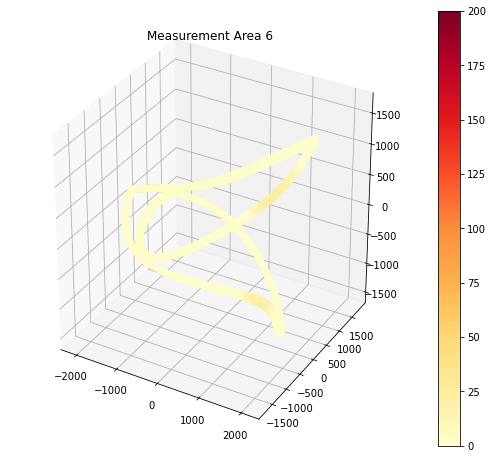

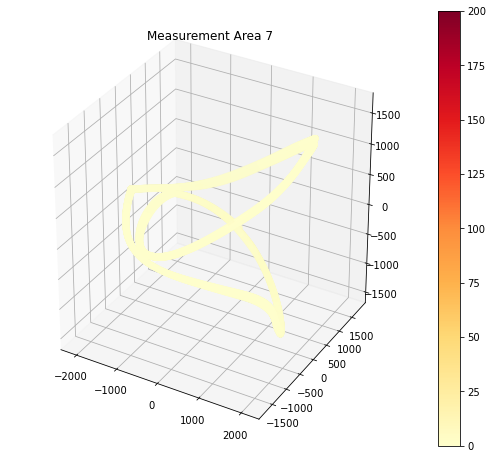

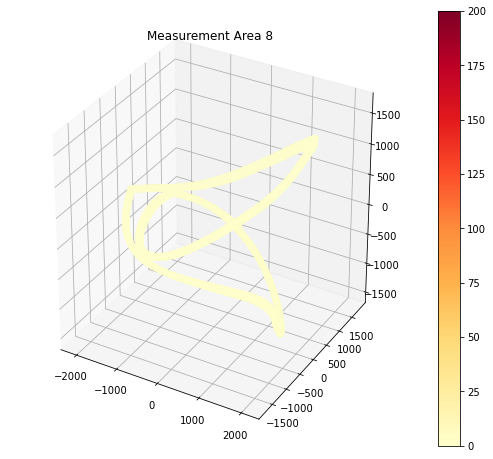

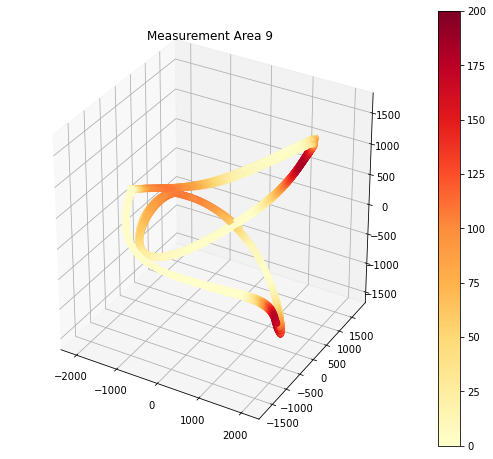

In [13]:
for i in range(9):
    fig = plt.figure(figsize=(20, 8))
    ax0 = fig.add_subplot(1, 2, 1, projection='3d')
    t = ax0.scatter(pc[:,0], pc[:,1], pc[:,2], c = data[:pc.shape[0], i + 1], cmap=plt.get_cmap("YlOrRd"), norm=clt.Normalize(vmin=0, vmax=200))
    plt.colorbar(t)
    plt.title(f"Measurement Area {i+1}")

### Normalized between min of each column and max of each column

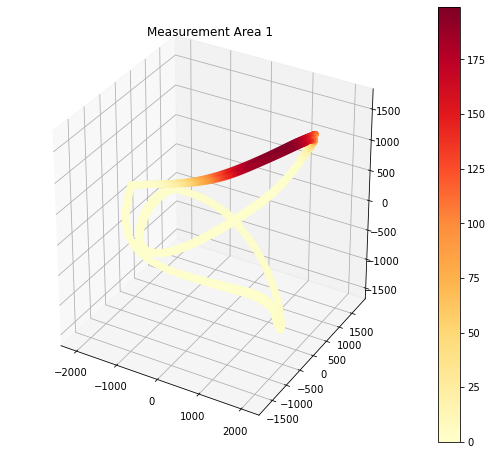

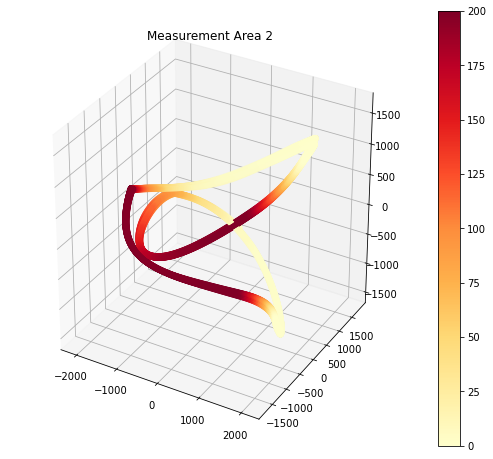

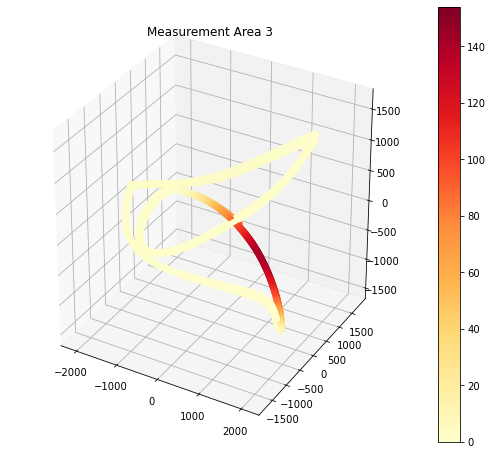

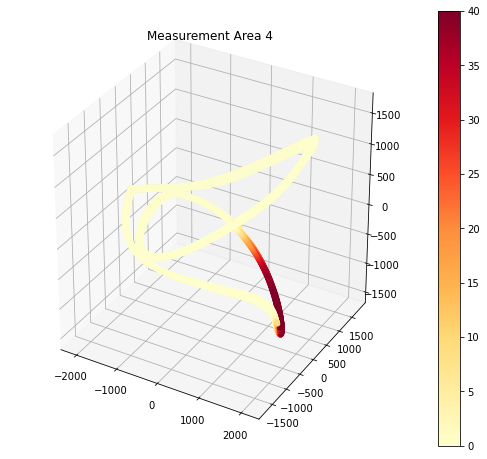

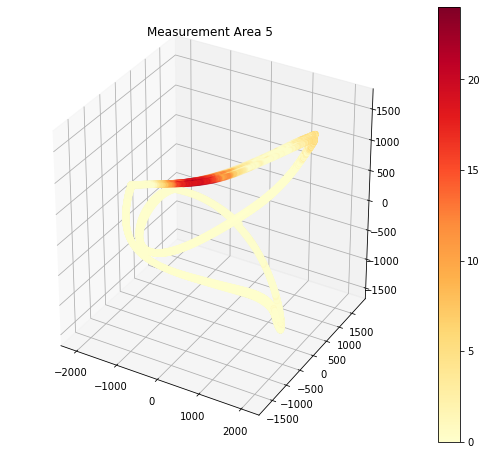

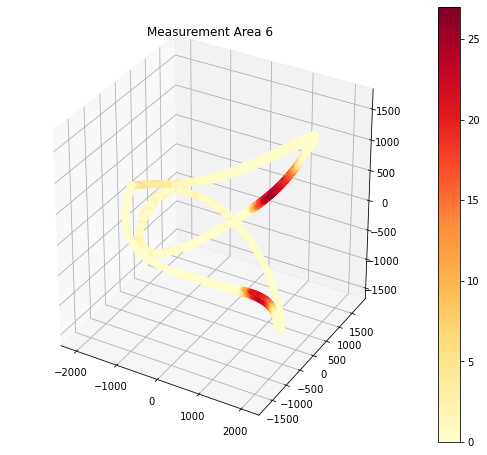

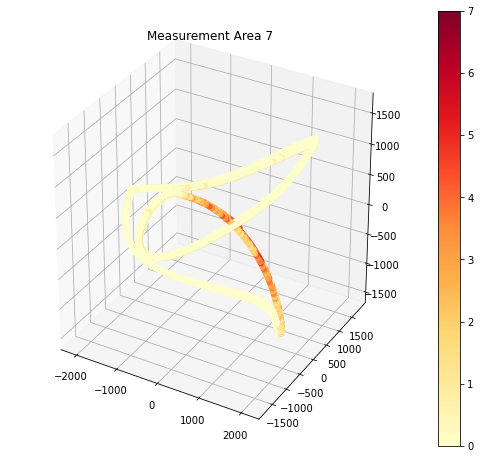

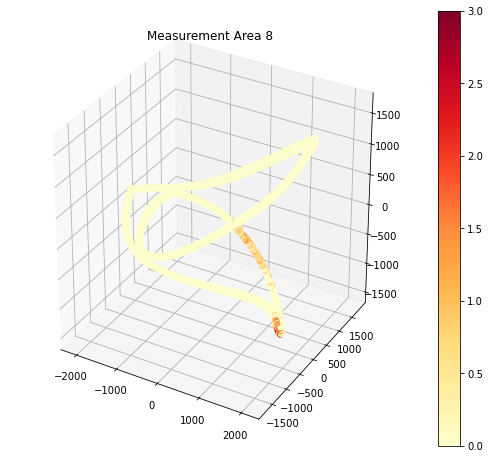

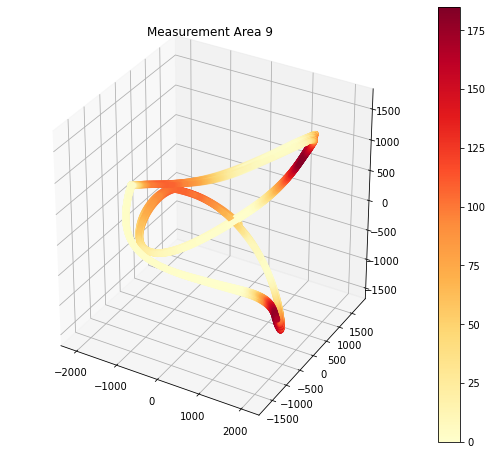

In [14]:
for i in range(9):
    fig = plt.figure(figsize=(20, 8))
    ax0 = fig.add_subplot(1, 2, 1, projection='3d')
    t = ax0.scatter(pc[:,0], pc[:,1], pc[:,2], c = data[:pc.shape[0], i + 1], cmap=plt.get_cmap("YlOrRd"))
    plt.colorbar(t)
    plt.title(f"Measurement Area {i+1}")

### Finding the approximate last point before it starts repeating itself

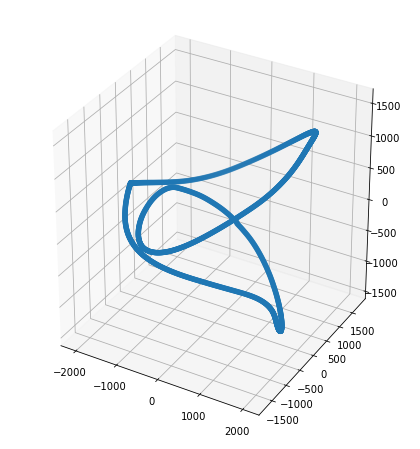

In [7]:
target = 1
limit = 2000
fig = plt.figure(figsize=(16, 8))
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
ax0.scatter(pc[limit * (target):limit * (target + 1),0], pc[limit * (target):limit * (target + 1),1], pc[limit * (target):limit * (target + 1),2])

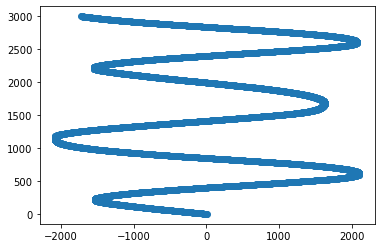

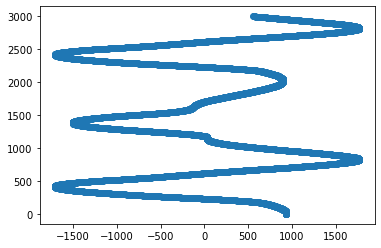

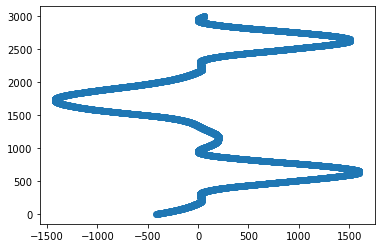

In [8]:
for i in range(3):
    time = np.arange(3000)
    plt.plot(pc[:3000,i], time, 'o');
    plt.show()

In [9]:
dist = np.linalg.norm(pc[1871]-pc[1872])
print(dist)

8.972431740161062


10.187927295184679


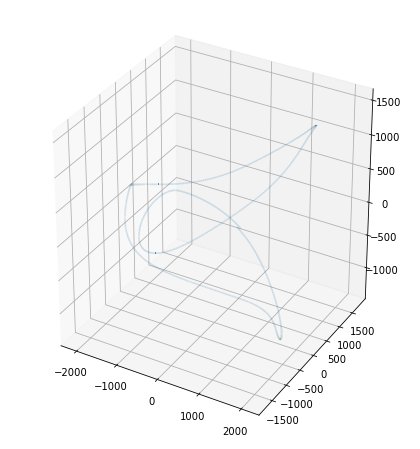

In [10]:
first = pc[:limit]
second = pc[1: limit + 1]
v = (second - first)

print(np.sqrt(np.sum(v[0]*v[0])))

fig = plt.figure(figsize=(16, 8))
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
ax0.quiver(pc[:limit,0], pc[:limit,1], pc[:limit,2], v[:,0], v[:,1], v[:,2], length=0.1)
plt.show()